# Main Import Statements
This part creates the basic import functions

In [1]:
import os
import pandas as pd
pd.set_option('max_colwidth', None)
pd.set_option('display.precision', 4)


/var/folders/y4/c4phbshn5739xq523fgf_cl40000gn/T/ipykernel_20727/4185754782.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def get_data_file_path(current_trial_name="v2_eval_20_3", base_folder="game_logs", trial_base_name="alfworld_eval_", csv_file_name="alfworld_results.csv"):
    """returns the csv file path."""
    current_trial_folder = trial_base_name + current_trial_name
    file_path = os.path.join(base_folder, current_trial_folder, csv_file_name)
    return file_path

In [3]:
def convert_string_to_bool(in_string):
    """if string ="" False, else True"""
    if in_string:
        return True
    else:
        return False

def convert_string_to_bool_int(in_string):
    """if string ="" False, else True"""
    if in_string:
        return 1
    else:
        return 0

def convert_bool_string_to_bool_int(in_string):
    """ if string==False -> False, etc."""
    if in_string=="(False,)" or in_string=="False":
        return 0
    elif in_string=="(True,)" or in_string=="True":
        return 1
    elif in_string=="0":
        return 0
    elif in_string=="1":
        return 1
    else:
        print(type(in_string))
        print(in_string)
        print(in_string[0])
        raise Exception("Error in Transforming BoolString to Int")

## Definitions for Part 1

In [3]:
def modify_text_prompt(keys_removed, thought_based=False):
    """changes to short version"""
    keys = keys_removed.count("+")
    prompt_name = ""
    if thought_based:
        if not ("thought" in keys_removed):
            thinking = True
            prompt_name += "think_"
        else:
            thinking = False
    
    if keys==0:
        if "prompt" == keys_removed:
            prompt_name += "long"
            return prompt_name
        return keys_removed

    # Heuristc for no state-tracking
    if "current_location" in keys_removed:
        prompt_name += "short_"
        
        # This means that we don't have current_objective
        if "current_objective" in keys_removed:
            if "plan" in keys_removed:
                if "goal" in keys_removed: 
                    if thought_based and thinking:
                        return "react_2_joined"
                else:
                    if thought_based and thinking:
                        return "react_2_goal"

    else:
        prompt_name += "long_"

    if "current_objective" in keys_removed:
        prompt_name += "noobj_"

    if "plan" in keys_removed:
        prompt_name += "noplan_"

    if "goal" in keys_removed: 
        prompt_name += "nogoal_"
        
    return prompt_name
    
        

In [9]:
from functools import partial

def load_data(current_trial_name, filter_flag=False, collect_results=False, override_filepath=False, thought_based=False):
    """Loads the data"""
    if override_filepath:
        file_path = current_trial_name
        full_file_path = file_path
    else:
        file_path = get_data_file_path(current_trial_name=current_trial_name)
        full_file_path = os.path.join("..",file_path)
    results_data = pd.read_csv(
        full_file_path, 
        converters = {
            "early_stop":convert_string_to_bool_int, 
            "error": convert_string_to_bool_int,
            "done": convert_bool_string_to_bool_int,
            "success": convert_bool_string_to_bool_int,
            # "keys_removed": partial(modify_text_prompt,thought_based=thought_based)
        }
    )
    if collect_results:
        clean_results = results_data
    else:
        header_order = ["model", "prompt_name","env_type","success","done","early_stop","num_of_steps","num_nothing_happens","num_repetitions","error", "env_idx","num_no_json"]
        clean_results = results_data[header_order]
    # Filters for short, long and react-2 prompts
    if filter_flag: 
        filtering_condition = (clean_results["keys_removed"]=="short") | (clean_results["keys_removed"]=="long") | (clean_results["keys_removed"]=="react-2") | (clean_results["keys_removed"]=="react-1")| (clean_results["keys_removed"]=="long-2") | (clean_results["keys_removed"]=="short-2") | (clean_results["keys_removed"]=="short-2-swaped") 
        clean_results = clean_results[ filtering_condition ]
    
    return clean_results

# Analysis Part 1

This is the original analysis part.

In [542]:
FLAG_ALL = False
FLAG_ALL = True
COLLECT_RESULTS = False

if FLAG_ALL:
    CURRENT_TRIAL_NAME = "v2_eval_20_3"
    CURRENT_TRIAL_NAME2 = "v2_eval_20-40"
    CURRENT_TRIAL_NAME3 = "v2_eval_60-40"
    CURRENT_TRIAL_NAME4 = "v2_eval_100-35"
    CURRENT_TRIAL_NAME5 = "v2_eval_0-60"
    CURRENT_TRIAL_NAME6 = "v2_eval_60-75"
    CURRENT_TRIAL_NAME7 = "v2_eval_20-115"
    CURRENT_TRIAL_NAME8 = "v2_eval_0-135"


    
    clean_results1 = load_data(CURRENT_TRIAL_NAME, filter_flag=True, collect_results=COLLECT_RESULTS)
    clean_results2 = load_data(CURRENT_TRIAL_NAME2, collect_results=COLLECT_RESULTS)
    clean_results3 = load_data(CURRENT_TRIAL_NAME3, collect_results=COLLECT_RESULTS)
    clean_results4 = load_data(CURRENT_TRIAL_NAME4, collect_results=COLLECT_RESULTS)
    clean_results5 = load_data(CURRENT_TRIAL_NAME5, collect_results=COLLECT_RESULTS)
    clean_results6 = load_data(CURRENT_TRIAL_NAME6, collect_results=COLLECT_RESULTS)
    clean_results7 = load_data(CURRENT_TRIAL_NAME7, collect_results=COLLECT_RESULTS)
    clean_results8 = load_data(CURRENT_TRIAL_NAME8, collect_results=COLLECT_RESULTS)
   
    
    # clean_results5,clean_results6,
    clean_results = pd.concat([clean_results1,clean_results2,clean_results3, clean_results4,clean_results7,clean_results8])
    print(clean_results.shape)
else:
    CURRENT_TRIAL_NAME4 = "v2_eval_20_3"
    clean_results = load_data(CURRENT_TRIAL_NAME)

# clean_results.to_csv("../results/all_results.csv",sep=",",index=False)
clean_results.head()

(1080, 12)


,model,keys_removed,temperature,env_type,success,done,early_stop,num_of_steps,num_nothing_happens,num_repetitions,error,env_idx
0,gpt-3.5-turbo-0125,react-1,0.0,cool,0,1,0,49,12,0,0,0
1,gpt-3.5-turbo-0125,react-1,0.0,clean,0,1,0,49,13,0,0,1
2,gpt-3.5-turbo-0125,react-1,0.0,clean,0,1,0,49,33,0,0,2
3,gpt-3.5-turbo-0125,react-1,0.0,put,0,1,0,49,26,0,0,3
4,gpt-3.5-turbo-0125,react-1,0.0,clean,0,1,0,49,39,2,0,4


In [543]:
# This is the table that shows results per env_type
out = clean_results.groupby(["model","keys_removed","env_type"]).sum().reset_index()
out["total"] = clean_results.groupby(["model","keys_removed","env_type"])["success"].count().reset_index()["success"]
out["success_std"] = clean_results.groupby(["model","keys_removed","env_type"])["success"].std().reset_index()["success"]
out["done_std"] = clean_results.groupby(["model","keys_removed","env_type"])["done"].std().reset_index()["done"]
out_header_order = ["model", "keys_removed","temperature","env_type","total","success","success_std","done","done_std","early_stop","num_of_steps","num_nothing_happens","num_repetitions"]
out = out[out_header_order]
# Adding a few more scores.
out["normalised_nothing"] = out["num_nothing_happens"] / out["num_of_steps"]
out["normalised_reps"] = out["num_repetitions"] / out["num_of_steps"]
out["success_percentage"] = out["success"] / out["total"]
out["success_percentage_done"] = out["success"] / out["done"]
out["done_percentage"] = out["done"] / out["total"]
out["normalised_total"] = out["total"] / 135
out["normalised_done"] = out["done"] / out["total"]

x = out.groupby(["env_type"])
x.head()

,model,keys_removed,temperature,env_type,total,success,success_std,done,done_std,early_stop,num_of_steps,num_nothing_happens,num_repetitions,normalised_nothing,normalised_reps,success_percentage,success_percentage_done,done_percentage,normalised_total,normalised_done
0,gpt-3.5-turbo-0125,long,0.0,clean,31,17,0.505879,25,0.401610,6,735,325,46,0.442177,0.062585,0.548387,0.680000,0.806452,0.229630,0.806452
1,gpt-3.5-turbo-0125,long,0.0,cool,21,2,0.300793,11,0.511766,10,751,296,83,0.394141,0.110519,0.095238,0.181818,0.523810,0.155556,0.523810
2,gpt-3.5-turbo-0125,long,0.0,examine,18,5,0.460889,13,0.460889,5,553,290,54,0.524412,0.097649,0.277778,0.384615,0.722222,0.133333,0.722222
3,gpt-3.5-turbo-0125,long,0.0,heat,23,13,0.506870,20,0.344350,3,521,270,35,0.518234,0.067179,0.565217,0.650000,0.869565,0.170370,0.869565
4,gpt-3.5-turbo-0125,long,0.0,put,25,5,0.408248,14,0.506623,11,760,379,84,0.498684,0.110526,0.200000,0.357143,0.560000,0.185185,0.560000
5,gpt-3.5-turbo-0125,long,0.0,puttwo,17,1,0.242536,8,0.514496,9,644,264,82,0.409938,0.127329,0.058824,0.125000,0.470588,0.125926,0.470588
6,gpt-3.5-turbo-0125,long-2,0.0,clean,31,16,0.508001,22,0.461414,9,690,221,60,0.320290,0.086957,0.516129,0.727273,0.709677,0.229630,0.709677
7,gpt-3.5-turbo-0125,long-2,0.0,cool,21,8,0.497613,15,0.462910,6,634,278,53,0.438486,0.083596,0.380952,0.533333,0.714286,0.155556,0.714286
8,gpt-3.5-turbo-0125,long-2,0.0,examine,18,1,0.235702,7,0.501631,11,504,469,133,0.930556,0.263889,0.055556,0.142857,0.388889,0.133333,0.388889
9,gpt-3.5-turbo-0125,long-2,0.0,heat,23,8,0.486985,11,0.510754,12,450,185,67,0.411111,0.148889,0.347826,0.727273,0.478261,0.170370,0.478261


In [544]:
out.to_csv("../results/pandas_output_per_env_type.csv",sep="&",index=False)

In [545]:
print(out[["model", "keys_removed","env_type","total","success"]])

                 model    keys_removed env_type  total  success
0   gpt-3.5-turbo-0125            long    clean     31       17
1   gpt-3.5-turbo-0125            long     cool     21        2
2   gpt-3.5-turbo-0125            long  examine     18        5
3   gpt-3.5-turbo-0125            long     heat     23       13
4   gpt-3.5-turbo-0125            long      put     25        5
5   gpt-3.5-turbo-0125            long   puttwo     17        1
6   gpt-3.5-turbo-0125          long-2    clean     31       16
7   gpt-3.5-turbo-0125          long-2     cool     21        8
8   gpt-3.5-turbo-0125          long-2  examine     18        1
9   gpt-3.5-turbo-0125          long-2     heat     23        8
10  gpt-3.5-turbo-0125          long-2      put     25       12
11  gpt-3.5-turbo-0125          long-2   puttwo     17        4
12  gpt-3.5-turbo-0125         react-1    clean     31        1
13  gpt-3.5-turbo-0125         react-1     cool     21        0
14  gpt-3.5-turbo-0125         react-1  

In [546]:
def create_pivot(variable="success"):# pivot1 = out.pivot(index=["keys_removed"],columns=["env_type"], values=["success"])
    pivot_table = pd.pivot_table(out, index=["model","keys_removed"],columns=["env_type"], aggfunc={variable:"first"})
    pivot_table.columns = pivot_table.columns.droplevel(0)
    # pivot1.columns.name=None
    piv_table = pivot_table.reset_index()
    return piv_table

piv1 = create_pivot("success")
piv1.head()

env_type,model,keys_removed,clean,cool,examine,heat,put,puttwo
0,gpt-3.5-turbo-0125,long,17,2,5,13,5,1
1,gpt-3.5-turbo-0125,long-2,16,8,1,8,12,4
2,gpt-3.5-turbo-0125,react-1,1,0,7,7,1,0
3,gpt-3.5-turbo-0125,react-2,7,1,12,13,3,7
4,gpt-3.5-turbo-0125,short,16,3,7,11,7,0


In [547]:
pivot_done = create_pivot("done")
pivot_done.head()

env_type,model,keys_removed,clean,cool,examine,heat,put,puttwo
0,gpt-3.5-turbo-0125,long,25,11,13,20,14,8
1,gpt-3.5-turbo-0125,long-2,22,15,7,11,14,8
2,gpt-3.5-turbo-0125,react-1,28,20,14,23,25,17
3,gpt-3.5-turbo-0125,react-2,27,16,14,20,24,14
4,gpt-3.5-turbo-0125,short,19,11,12,18,13,5


In [548]:
pivot_done = create_pivot("num_repetitions")
pivot_done.head()

env_type,model,keys_removed,clean,cool,examine,heat,put,puttwo
0,gpt-3.5-turbo-0125,long,46,83,54,35,84,82
1,gpt-3.5-turbo-0125,long-2,60,53,133,67,68,62
2,gpt-3.5-turbo-0125,react-1,26,16,33,7,13,3
3,gpt-3.5-turbo-0125,react-2,43,41,27,37,16,22
4,gpt-3.5-turbo-0125,short,86,64,46,42,80,75


In [549]:
pivot_done = create_pivot("num_nothing_happens")
pivot_done.head()

env_type,model,keys_removed,clean,cool,examine,heat,put,puttwo
0,gpt-3.5-turbo-0125,long,325,296,290,270,379,264
1,gpt-3.5-turbo-0125,long-2,221,278,469,185,214,184
2,gpt-3.5-turbo-0125,react-1,750,541,273,365,609,359
3,gpt-3.5-turbo-0125,react-2,479,486,135,265,520,175
4,gpt-3.5-turbo-0125,short,284,399,301,226,387,244


In [550]:
pivot_done = create_pivot("success_percentage") #higher is better
# pivot_done.head()
pivot_done

env_type,model,keys_removed,clean,cool,examine,heat,put,puttwo
0,gpt-3.5-turbo-0125,long,0.548387,0.095238,0.277778,0.565217,0.20,0.058824
1,gpt-3.5-turbo-0125,long-2,0.516129,0.380952,0.055556,0.347826,0.48,0.235294
2,gpt-3.5-turbo-0125,react-1,0.032258,0.000000,0.388889,0.304348,0.04,0.000000
3,gpt-3.5-turbo-0125,react-2,0.225806,0.047619,0.666667,0.565217,0.12,0.411765
4,gpt-3.5-turbo-0125,short,0.516129,0.142857,0.388889,0.478261,0.28,0.000000
5,gpt-3.5-turbo-0125,short-1-swaped,0.193548,0.285714,0.111111,0.173913,0.40,0.058824
6,gpt-3.5-turbo-0125,short-2,0.483871,0.380952,0.222222,0.478261,0.32,0.176471
7,gpt-3.5-turbo-0125,short-2-swaped,0.580645,0.571429,0.166667,0.478261,0.68,0.176471


In [551]:
pivot_done = create_pivot("normalised_nothing") #lower is better (this shows how many of the actions result in "nothing happens"
pivot_done.head()

env_type,model,keys_removed,clean,cool,examine,heat,put,puttwo
0,gpt-3.5-turbo-0125,long,0.442177,0.394141,0.524412,0.518234,0.498684,0.409938
1,gpt-3.5-turbo-0125,long-2,0.320290,0.438486,0.930556,0.411111,0.422091,0.362919
2,gpt-3.5-turbo-0125,react-1,0.530035,0.537239,0.473958,0.433492,0.514793,0.430972
3,gpt-3.5-turbo-0125,react-2,0.402183,0.526544,0.402985,0.433007,0.471869,0.281804
4,gpt-3.5-turbo-0125,short,0.453674,0.547325,0.582205,0.432122,0.533793,0.427320


In [552]:
pivot_done = create_pivot("normalised_done") #higher is better (this shows how many reached done, without early stop)
pivot_done.head()

env_type,model,keys_removed,clean,cool,examine,heat,put,puttwo
0,gpt-3.5-turbo-0125,long,0.806452,0.523810,0.722222,0.869565,0.56,0.470588
1,gpt-3.5-turbo-0125,long-2,0.709677,0.714286,0.388889,0.478261,0.56,0.470588
2,gpt-3.5-turbo-0125,react-1,0.903226,0.952381,0.777778,1.000000,1.00,1.000000
3,gpt-3.5-turbo-0125,react-2,0.870968,0.761905,0.777778,0.869565,0.96,0.823529
4,gpt-3.5-turbo-0125,short,0.612903,0.523810,0.666667,0.782609,0.52,0.294118


In [553]:
pivot_done = create_pivot("success_percentage_done") #higher is better (this show successful run out of all done [not total]
pivot_done.head()

env_type,model,keys_removed,clean,cool,examine,heat,put,puttwo
0,gpt-3.5-turbo-0125,long,0.680000,0.181818,0.384615,0.650000,0.357143,0.125
1,gpt-3.5-turbo-0125,long-2,0.727273,0.533333,0.142857,0.727273,0.857143,0.500
2,gpt-3.5-turbo-0125,react-1,0.035714,0.000000,0.500000,0.304348,0.040000,0.000
3,gpt-3.5-turbo-0125,react-2,0.259259,0.062500,0.857143,0.650000,0.125000,0.500
4,gpt-3.5-turbo-0125,short,0.842105,0.272727,0.583333,0.611111,0.538462,0.000


In [554]:
pivot_done = create_pivot("normalised_reps") #lower is better (this shows number of reps out of all steps, mind you we cut after 5 exact reps)
pivot_done.head()

env_type,model,keys_removed,clean,cool,examine,heat,put,puttwo
0,gpt-3.5-turbo-0125,long,0.062585,0.110519,0.097649,0.067179,0.110526,0.127329
1,gpt-3.5-turbo-0125,long-2,0.086957,0.083596,0.263889,0.148889,0.134122,0.122288
2,gpt-3.5-turbo-0125,react-1,0.018375,0.015889,0.057292,0.008314,0.010989,0.003601
3,gpt-3.5-turbo-0125,react-2,0.036104,0.044420,0.080597,0.060458,0.014519,0.035427
4,gpt-3.5-turbo-0125,short,0.137380,0.087791,0.088975,0.080306,0.110345,0.131349


In [555]:
pivot2 = pd.pivot_table(out, columns=["env_type"], aggfunc={"total":"first"})
pivot2["keys_removed"] = "total"
piv2 = pivot2.reset_index()
piv2.head()

env_type,index,clean,cool,examine,heat,put,puttwo,keys_removed
0,total,31,21,18,23,25,17,total


In [556]:
pivot3 = pd.pivot_table(out, columns=["env_type"], aggfunc={"normalised_total":"first"})
pivot3["keys_removed"] = "total"
piv3 = pivot3.reset_index()
piv3.head()

env_type,index,clean,cool,examine,heat,put,puttwo,keys_removed
0,normalised_total,0.22963,0.155556,0.133333,0.17037,0.185185,0.125926,total


In [557]:
new = pd.concat([piv1,piv2])
new = new.drop("index",axis=1)
new.head()

env_type,model,keys_removed,clean,cool,examine,heat,put,puttwo
0,gpt-3.5-turbo-0125,long,17,2,5,13,5,1
1,gpt-3.5-turbo-0125,long-2,16,8,1,8,12,4
2,gpt-3.5-turbo-0125,react-1,1,0,7,7,1,0
3,gpt-3.5-turbo-0125,react-2,7,1,12,13,3,7
4,gpt-3.5-turbo-0125,short,16,3,7,11,7,0


In [611]:
x=[14	,12	,15	,16	,23	,6]
x

[14, 12, 15, 16, 23, 6]

In [558]:
# This is the table that shows total results.
out = clean_results.groupby(["model","keys_removed"]).sum().reset_index()
out["total"] = clean_results.groupby(["model","keys_removed"])["success"].count().reset_index()["success"]
out_header_order = ["model", "keys_removed","temperature","total","success","done","early_stop","num_of_steps","num_nothing_happens","num_repetitions"]
out = out[out_header_order]
out["normalised_nothing"] = out["num_nothing_happens"] / out["num_of_steps"]
out["normalised_reps"] = out["num_repetitions"] / out["num_of_steps"]
out["success_percentage"] = out["success"] / out["total"]
out["success_percentage_done"] = out["success"] / out["done"]
out["done_percentage"] = out["done"] / out["total"]
x = out.groupby("keys_removed")
x.head()

,model,keys_removed,temperature,total,success,done,early_stop,num_of_steps,num_nothing_happens,num_repetitions,normalised_nothing,normalised_reps,success_percentage,success_percentage_done,done_percentage
0,gpt-3.5-turbo-0125,long,0.0,135,43,91,44,3964,1824,384,0.460141,0.096872,0.318519,0.472527,0.674074
1,gpt-3.5-turbo-0125,long-2,0.0,135,49,77,58,3292,1551,443,0.471142,0.134569,0.362963,0.636364,0.570370
2,gpt-3.5-turbo-0125,react-1,0.0,135,16,127,8,5856,2897,98,0.494706,0.016735,0.118519,0.125984,0.940741
3,gpt-3.5-turbo-0125,react-2,0.0,135,43,115,20,4784,2060,186,0.430602,0.038880,0.318519,0.373913,0.851852
4,gpt-3.5-turbo-0125,short,0.0,135,44,78,57,3691,1841,393,0.498781,0.106475,0.325926,0.564103,0.577778
5,gpt-3.5-turbo-0125,short-1-swaped,0.0,135,29,80,55,4407,2351,496,0.533469,0.112548,0.214815,0.362500,0.592593
6,gpt-3.5-turbo-0125,short-2,0.0,135,49,88,47,3425,1455,350,0.424818,0.102190,0.362963,0.556818,0.651852
7,gpt-3.5-turbo-0125,short-2-swaped,0.0,135,64,98,37,3274,1582,354,0.483201,0.108125,0.474074,0.653061,0.725926


In [559]:
summary_header = ["keys_removed","success_percentage","success_percentage_done","done_percentage","normalised_reps","normalised_nothing"]
outsummary = out[summary_header]
x = outsummary.groupby("keys_removed")
x.head()

,keys_removed,success_percentage,success_percentage_done,done_percentage,normalised_reps,normalised_nothing
0,long,0.318519,0.472527,0.674074,0.096872,0.460141
1,long-2,0.362963,0.636364,0.570370,0.134569,0.471142
2,react-1,0.118519,0.125984,0.940741,0.016735,0.494706
3,react-2,0.318519,0.373913,0.851852,0.038880,0.430602
4,short,0.325926,0.564103,0.577778,0.106475,0.498781
5,short-1-swaped,0.214815,0.362500,0.592593,0.112548,0.533469
6,short-2,0.362963,0.556818,0.651852,0.102190,0.424818
7,short-2-swaped,0.474074,0.653061,0.725926,0.108125,0.483201


In [465]:
out.to_csv("../results/pandas_output_all_results.csv",sep="&",index=False)

In [466]:
# This is the table that shows results per env_id
out = clean_results.groupby(["model","env_idx","keys_removed","env_type"]).sum().reset_index()
out_header_order = ["model", "keys_removed","temperature","env_idx","env_type","success","done","early_stop","num_of_steps","num_nothing_happens","num_repetitions"]
out = out[out_header_order]
x = out.groupby("env_idx")
x.head()

,model,keys_removed,temperature,env_idx,env_type,success,done,early_stop,num_of_steps,num_nothing_happens,num_repetitions
0,gpt-3.5-turbo-0125,long,0.0,0,cool,0,0,1,33,21,7
1,gpt-3.5-turbo-0125,long-1-swaped,0.0,0,cool,0,0,1,47,24,9
2,gpt-3.5-turbo-0125,long-2,0.0,0,cool,0,1,0,49,43,0
3,gpt-3.5-turbo-0125,long-2-swaped,0.0,0,cool,1,1,0,16,4,2
4,gpt-3.5-turbo-0125,react-1,0.0,0,cool,0,1,0,49,12,0
...,...,...,...,...,...,...,...,...,...,...,...
1608,gpt-3.5-turbo-0125,long,0.0,134,put,0,0,1,43,12,5
1609,gpt-3.5-turbo-0125,long-1-swaped,0.0,134,put,1,1,0,4,0,0
1610,gpt-3.5-turbo-0125,long-2,0.0,134,put,1,1,0,7,1,0
1611,gpt-3.5-turbo-0125,long-2-swaped,0.0,134,put,1,1,0,4,0,0


In [467]:
pivot_per_env = out.pivot(index=["env_idx","env_type"],columns=["keys_removed"], values=["success"])
pivot_per_env

success                                             \
keys_removed        long long-1-swaped long-2 long-2-swaped react-1   
env_idx env_type                                                      
0       cool           0             0      0             1       0   
1       clean          0             0      1             0       0   
2       clean          1             0      1             1       0   
3       put            0             0      0             1       0   
4       clean          0             0      0             0       0   
...                  ...           ...    ...           ...     ...   
130     examine        1             0      0             1       0   
131     heat           0             1      0             1       1   
132     clean          0             0      0             0       0   
133     examine        0             0      0             0       0   
134     put            0             1      1             1       0   

                                                                             \
keys_removed     react-1-swaped react-2 react-2-swaped short short-1-swaped   
env_idx env_type                                                              
0       cool                  0       1              0     0              0   
1       clean                 0       0              0     1              0   
2       clean                 0       0              0     0              0   
3       put                   0       0              0     1              0   
4       clean                 0       0              0     0              1   
...                         ...     ...            ...   ...            ...   
130     examine               0       0              1     1              0   
131     heat                  0       1              1     1              0   
132     clean                 0       0              0     0              0   
133     examine               0       1              0     0              0   
134     put                   0       0              0     0              1   

                                         
keys_removed     short-2 short-2-swaped  
env_idx env_type                         
0       cool           1              1  
1       clean          1              0  
2       clean          1              0  
3       put            0              1  
4       clean          0              0  
...                  ...            ...  
130     examine        0              1  
131     heat           1              1  
132     clean          0              1  
133     examine        0              0  
134     put            1              1  

[135 rows x 12 columns]

In [468]:
p2 = pivot_per_env.droplevel(0,axis=1)
p3 = p2.reset_index()

In [479]:
def create_analysis(key1, key2, p3):
    k1vsk2 = key1+" wins"
    k2vsk1 = key2+" wins"
    k1isk2 = "Draw"  
    
    x = pd.DataFrame()
    x["env_type"] = p3["env_type"].values

    x[k1vsk2] = (p3[key1] > p3[key2]) * 1.0
    x[k2vsk1] = (p3[key1] < p3[key2]) * 1.0
    x[k1isk2] = (p3[key1] == p3[key2]) * 1.0
    pivot = pd.pivot_table(x, columns=["env_type"], aggfunc={k1vsk2:"sum", k2vsk1:"sum", k1isk2:"sum"})
    return pivot

In [480]:
create_analysis("long","long-1-swaped",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,18.0,13.0,11.0,12.0,16.0,14.0
long wins,13.0,0.0,5.0,10.0,3.0,1.0
long-1-swaped wins,0.0,8.0,2.0,1.0,6.0,2.0


In [501]:
create_analysis("long","long-2",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,20.0,11.0,12.0,16.0,16.0,14.0
long wins,6.0,2.0,5.0,6.0,1.0,0.0
long-2 wins,5.0,8.0,1.0,1.0,8.0,3.0


In [503]:
create_analysis("long","long-2-swaped",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,22.0,13.0,13.0,17.0,12.0,16.0
long wins,7.0,0.0,2.0,5.0,1.0,0.0
long-2-swaped wins,2.0,8.0,3.0,1.0,12.0,1.0


In [502]:
create_analysis("long-1-swaped","long-2",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,19.0,13.0,15.0,15.0,17.0,13.0
long-1-swaped wins,0.0,5.0,2.0,2.0,2.0,1.0
long-2 wins,12.0,3.0,1.0,6.0,6.0,3.0


In [504]:
create_analysis("long-1-swaped","long-2-swaped",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,21.0,15.0,12.0,16.0,15.0,13.0
long-1-swaped wins,1.0,3.0,1.0,1.0,1.0,2.0
long-2-swaped wins,9.0,3.0,5.0,6.0,9.0,2.0


In [505]:
create_analysis("long-2","long-2-swaped",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,25.0,11.0,11.0,18.0,17.0,13.0
long-2 wins,5.0,4.0,1.0,2.0,2.0,3.0
long-2-swaped wins,1.0,6.0,6.0,3.0,6.0,1.0


In [494]:
create_analysis("short","short-1-swaped",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,17.0,18.0,11.0,14.0,17.0,15.0
short wins,12.0,0.0,6.0,7.0,2.0,0.0
short-1-swaped wins,2.0,3.0,1.0,2.0,6.0,2.0


In [495]:
create_analysis("short-2","short-2-swaped",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,20.0,15.0,11.0,19.0,14.0,15.0
short-2 wins,4.0,1.0,4.0,2.0,1.0,1.0
short-2-swaped wins,7.0,5.0,3.0,2.0,10.0,1.0


In [496]:
create_analysis("react-1","react-1-swaped",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,30.0,19.0,9.0,14.0,24.0,11.0
react-1 wins,1.0,0.0,7.0,7.0,0.0,0.0
react-1-swaped wins,0.0,2.0,2.0,2.0,1.0,6.0


In [497]:
create_analysis("react-2","react-2-swaped",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,26.0,13.0,12.0,14.0,20.0,12.0
react-2 wins,2.0,1.0,2.0,4.0,2.0,2.0
react-2-swaped wins,3.0,7.0,4.0,5.0,3.0,3.0


In [498]:
create_analysis("long-2-swaped","react-2-swaped",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,19.0,12.0,8.0,12.0,13.0,9.0
long-2-swaped wins,8.0,6.0,1.0,3.0,12.0,1.0
react-2-swaped wins,4.0,3.0,9.0,8.0,0.0,7.0


In [499]:
create_analysis("react-2-swaped","short-2-swaped",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,19.0,12.0,5.0,16.0,12.0,8.0
react-2-swaped wins,1.0,2.0,12.0,5.0,0.0,7.0
short-2-swaped wins,11.0,7.0,1.0,2.0,13.0,2.0


In [500]:
create_analysis("long-2-swaped","short-2-swaped",p3)

env_type,clean,cool,examine,heat,put,puttwo
Draw,21.0,19.0,13.0,19.0,18.0,16.0
long-2-swaped wins,2.0,0.0,4.0,1.0,3.0,0.0
short-2-swaped wins,8.0,2.0,1.0,3.0,4.0,1.0


In [585]:
deepdive = load_data("deepdive_results.csv",collect_results=True, override_filepath=True)
deepdive.head()

,total_nothing,total_not_valid_nothing,put_not_valid_nothing,hallucinated_not_valid_nothing,hallucinated_example,fake_not_h_not_valid_nothing,fake_command_example,total_valid_nothing,take_valid_nothing,valid_nothing_example,...,num_json_dsnt_load,num_multi_json,num_no_json,num_json_and_text,error,early_stop,keys_removed,additional_prompt_annotation,trace_file,prompt_file
0,12,6,6,0,NO_EXAMPLE,6,put tomato 1 on stoveburner 1,6,6,NO EXAMPLE,...,50,0,50,0,1,1,react-1,NaN,game_logs/alfworld_eval_v2_eval_20_3/OpenAITex...,game_logs/alfworld_eval_v2_eval_20_3/prompt_18...
1,13,13,13,0,NO_EXAMPLE,13,put spatula 1 in microwave 1,0,0,NO EXAMPLE,...,50,0,50,0,1,1,react-1,NaN,game_logs/alfworld_eval_v2_eval_20_3/OpenAITex...,game_logs/alfworld_eval_v2_eval_20_3/prompt_18...
2,32,10,10,0,NO_EXAMPLE,10,put plate 1 back in cabinet 1,22,18,go to diningtable 1,...,50,0,50,0,1,1,react-1,NaN,game_logs/alfworld_eval_v2_eval_20_3/OpenAITex...,game_logs/alfworld_eval_v2_eval_20_3/prompt_18...
3,25,16,1,0,NO_EXAMPLE,16,pick up cellphone 3 from shelf 11,9,6,go to shelf 3,...,50,0,50,0,1,1,react-1,NaN,game_logs/alfworld_eval_v2_eval_20_3/OpenAITex...,game_logs/alfworld_eval_v2_eval_20_3/prompt_18...
4,38,35,10,20,put cloth 1 on top of cloth 2 in cabinet 4,15,put cloth 1 with cloth 2 in cabinet 4,3,3,NO EXAMPLE,...,50,0,50,0,1,1,react-1,NaN,game_logs/alfworld_eval_v2_eval_20_3/OpenAITex...,game_logs/alfworld_eval_v2_eval_20_3/prompt_18...


In [613]:
def analyse_deepdive(in_data):
    # This is the table that shows total results.
    out = in_data.groupby(["model","keys_removed"]).sum().reset_index()
    out["total"] = in_data.groupby(["model","keys_removed"])["success"].count().reset_index()["success"]
    out_header_order = ["model", "keys_removed","total","success","done","num_of_steps","total_nothing","total_not_valid_nothing","hallucinated_not_valid_nothing","fake_not_h_not_valid_nothing","put_not_valid_nothing","total_valid_nothing","take_valid_nothing"]
    out = out[out_header_order]
    # out["normalised_nothing"] = out["num_nothing_happens"] / out["num_of_steps"]
    # out["normalised_reps"] = out["num_repetitions"] / out["num_of_steps"]
    out["normalised_nothing"] = out["total_nothing"] / out["num_of_steps"]
    out["normalised_not_valid_nothing"] = out["total_not_valid_nothing"] / out["num_of_steps"]
    out["proportion_of_not_valid_in_nothing"] = out["total_not_valid_nothing"] / out["total_nothing"]
    out["proportion_of_valid_in_nothing"] = out["total_valid_nothing"] / out["total_nothing"]
    out["proportion_of_hallucinated_in_not_valid"] = out["hallucinated_not_valid_nothing"] / out["total_not_valid_nothing"]
    out["proportion_of_fake_in_not_valid"] = out["fake_not_h_not_valid_nothing"] / out["total_not_valid_nothing"]
    
    # out["success_percentage"] = out["success"] / out["total"]
    # out["success_percentage_done"] = out["success"] / out["done"]
    # out["done_percentage"] = out["done"] / out["total"]
    x = out.groupby("keys_removed")
    return x

In [616]:
x = analyse_deepdive(deepdive)
x.head()

,model,keys_removed,total,success,done,num_of_steps,total_nothing,total_not_valid_nothing,hallucinated_not_valid_nothing,fake_not_h_not_valid_nothing,put_not_valid_nothing,total_valid_nothing,take_valid_nothing,normalised_nothing,normalised_not_valid_nothing,proportion_of_not_valid_in_nothing,proportion_of_valid_in_nothing,proportion_of_hallucinated_in_not_valid,proportion_of_fake_in_not_valid
0,gpt-3.5-turbo-0125,long,135,43,91,3964,1747,1155,876,279,113,592,361,0.440716,0.291372,0.661133,0.338867,0.758442,0.241558
1,gpt-3.5-turbo-0125,long-1-swaped,135,30,69,3848,1856,1223,893,330,58,633,369,0.482328,0.317827,0.658944,0.341056,0.730172,0.269828
2,gpt-3.5-turbo-0125,long-2,135,49,77,3292,1472,1009,794,215,34,463,299,0.447145,0.306501,0.685462,0.314538,0.786918,0.213082
3,gpt-3.5-turbo-0125,long-2-swaped,135,55,86,3271,1343,725,603,122,16,618,397,0.410578,0.221645,0.539836,0.460164,0.831724,0.168276
4,gpt-3.5-turbo-0125,react-1,135,16,127,5856,2815,2105,565,1540,1091,710,331,0.480704,0.359460,0.747780,0.252220,0.268409,0.731591
5,gpt-3.5-turbo-0125,react-1-swaped,135,14,117,5810,2617,2002,604,1398,879,615,247,0.450430,0.344578,0.764998,0.235002,0.301698,0.698302
6,gpt-3.5-turbo-0125,react-2,135,43,115,4784,1996,1499,385,1114,836,497,228,0.417224,0.313336,0.751002,0.248998,0.256838,0.743162
7,gpt-3.5-turbo-0125,react-2-swaped,135,55,120,4380,1756,1328,354,974,783,428,211,0.400913,0.303196,0.756264,0.243736,0.266566,0.733434
8,gpt-3.5-turbo-0125,short,135,44,78,3691,1756,1152,789,363,144,604,388,0.475752,0.312111,0.656036,0.343964,0.684896,0.315104
9,gpt-3.5-turbo-0125,short-1-swaped,135,33,63,3852,2051,1337,860,477,72,714,443,0.532451,0.347092,0.651877,0.348123,0.643231,0.356769


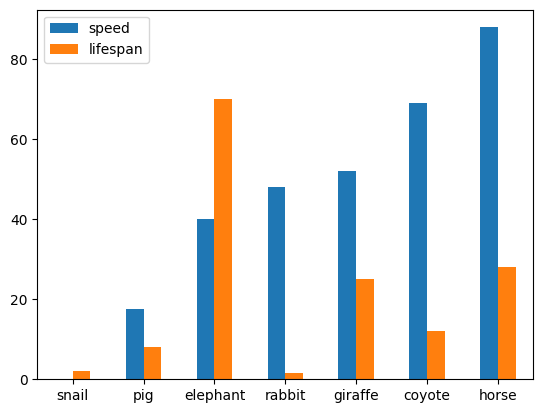

In [587]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

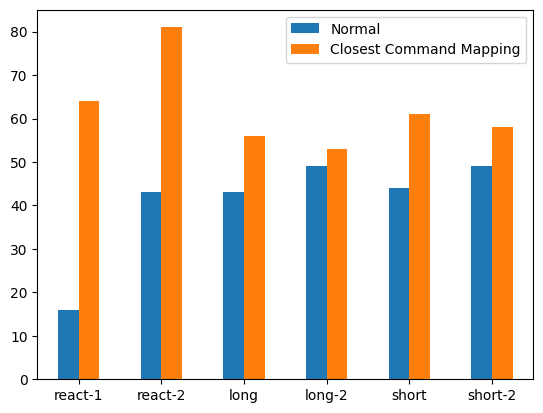

In [593]:
data = {'react-1': 16, 'react-1_modified': 64, 'react-2': 43, 'react-2_modified': 81, 'long': 43, 'long_modified': 56, 'short': 44, 'short_modified': 61, 'short-2': 49, 'short-2_modified': 58, 'long-2': 49, 'long-2_modified': 53, 'short-2-swaped': 64, 'short-2-swaped_modified': 68, 'long-2-swaped': 55, 'long-2-swaped_modified': 57, 'react-2-swaped': 55, 'react-2-swaped_modified': 88, 'short-1-swaped': 33, 'short-1-swaped_modified': 41, 'react-1-swaped': 14, 'react-1-swaped_modified': 61, 'long-1-swaped': 30, 'long-1-swaped_modified': 34}
data_index = ["react-1","react-2","long","long-2","short","short-2"]
data_index_swaped = ["react-1-swaped","react-2-swaped","long-1-swaped","long-2-swaped","short-1-swaped","short-2-swaped"]
modifier = "_modified"
data_normal = [data[x] for x in data_index]
data_modified = [data[x+modifier] for x in data_index]
df = pd.DataFrame({'Normal': data_normal,
                   'Closest Command Mapping': data_modified}, index=data_index)
ax = df.plot.bar(rot=0)

# Analysis Part Two
This is the new part of the analysis.

# Analysis Part Three
This is the new part of the analysis.

In [4]:
def load_data(trial_name):
    file_path=os.path.join("..","game_logs",f"alfworld_eval_{trial_name}","alfworld_results.csv")
    df = pd.read_csv(
        file_path, 
        quoting=1,
        index_col=False, 
        converters = {
            "early_stop":convert_string_to_bool_int, 
            "error": convert_string_to_bool_int
        }
    )
    return df

In [5]:
# Analysis Part Three
def analyse_data_basic(input_data):
    # This is the table that shows total results.
    out = input_data.groupby(["model","keys_removed"]).sum().reset_index()
    out["total"] = input_data.groupby(["model","keys_removed"])["success"].count().reset_index()["success"]
    
    # out_header_order = ["model", "prompt_name","env_idx","env_type","success","done","early_stop","num_of_steps","num_nothing_happens","num_repetitions","num_no_json","error"]
    out_header_order = ["model", "keys_removed","env_idx","success","done","early_stop","error","num_of_steps"]

    out = out[out_header_order]
   
    # out["normalised_nothing"] = out["num_nothing_happens"] / out["num_of_steps"]
    # out["normalised_reps"] = out["num_repetitions"] / out["num_of_steps"]
    # out["normalised_nothing"] = out["total_nothing"] / out["num_of_steps"]
    # out["normalised_not_valid_nothing"] = out["total_not_valid_nothing"] / out["num_of_steps"]
    # out["proportion_of_not_valid_in_nothing"] = out["total_not_valid_nothing"] / out["total_nothing"]
    # out["proportion_of_valid_in_nothing"] = out["total_valid_nothing"] / out["total_nothing"]
    # out["proportion_of_hallucinated_in_not_valid"] = out["hallucinated_not_valid_nothing"] / out["total_not_valid_nothing"]
    # out["proportion_of_fake_in_not_valid"] = out["fake_not_h_not_valid_nothing"] / out["total_not_valid_nothing"]
    
    out["success_percentage"] = out["success"] / 135 * 100   # out["success_percentage_done"] = out["success"] / out["done"]
    # out["done_percentage"] = out["done"] / out["total"]
    x = out.groupby("keys_removed")

    out_header_order = ["keys_removed","model","success_percentage","done"]
    out2 = out[out_header_order]
    return x, out2

def analyse_data_old(input_data):
    # This is the table that shows total results.
    out = input_data.groupby(["model","prompt_name","correction"]).sum().reset_index()
    out["total"] = input_data.groupby(["model","prompt_name","correction"])["success"].count().reset_index()["success"]
    
    # out_header_order = ["model", "prompt_name","env_idx","env_type","success","done","early_stop","num_of_steps","num_nothing_happens","num_repetitions","num_no_json","error"]
    out_header_order = ["model", "prompt_name","correction","env_idx","success","done","early_stop","error","num_of_steps"]

    out = out[out_header_order]
   
    # out["normalised_nothing"] = out["num_nothing_happens"] / out["num_of_steps"]
    # out["normalised_reps"] = out["num_repetitions"] / out["num_of_steps"]
    # out["normalised_nothing"] = out["total_nothing"] / out["num_of_steps"]
    # out["normalised_not_valid_nothing"] = out["total_not_valid_nothing"] / out["num_of_steps"]
    # out["proportion_of_not_valid_in_nothing"] = out["total_not_valid_nothing"] / out["total_nothing"]
    # out["proportion_of_valid_in_nothing"] = out["total_valid_nothing"] / out["total_nothing"]
    # out["proportion_of_hallucinated_in_not_valid"] = out["hallucinated_not_valid_nothing"] / out["total_not_valid_nothing"]
    # out["proportion_of_fake_in_not_valid"] = out["fake_not_h_not_valid_nothing"] / out["total_not_valid_nothing"]
    
    out["success_percentage"] = out["success"] / 135 * 100
    # out["success_percentage_done"] = out["success"] / out["done"]
    # out["done_percentage"] = out["done"] / out["total"]
    x = out.groupby("prompt_name")

    out_header_order = ["prompt_name","model","success_percentage","done"]
    out2 = out[out_header_order]
    return x, out2

def analyse_data_new(input_data):
    # This is the table that shows total results.
    out = input_data.groupby(["model","prompt_name","correction","resample"]).sum().reset_index()
    out["total"] = input_data.groupby(["model","prompt_name","correction","resample"])["success"].count().reset_index()["success"]
    
    # out_header_order = ["model", "prompt_name","env_idx","env_type","success","done","early_stop","num_of_steps","num_nothing_happens","num_repetitions","num_no_json","error"]
    out_header_order = ["model", "prompt_name","correction","resample","env_idx","success","done","early_stop","error","num_of_steps","num_nothing_happens","num_repetitions","num_no_command","total_in_token_accumulated","total_out_token_accumulated", "num_correction"]

    out = out[out_header_order]
    out["success_percentage"] = out["success"] / 135 * 100
    x = out.groupby("prompt_name")

    out_header_order = ["prompt_name","model","success_percentage","done"]#,"num_nothing_happens","num_repetitions","total_in_token_accumulated","total_out_token_accumulated", "num_correction"]
    out2 = out[out_header_order]
    return x, out2

def no_groupby_analyse_data(input_data):
    # This is the table that shows total results.
    out = input_data.groupby(["model","prompt_name","correction","resample"]).sum().reset_index()
    out["total"] = input_data.groupby(["model","prompt_name","correction","resample"])["success"].count().reset_index()["success"]
    
    # out_header_order = ["model", "prompt_name","env_idx","env_type","success","done","early_stop","num_of_steps","num_nothing_happens","num_repetitions","num_no_json","error"]
    out_header_order = ["model", "prompt_name","correction","resample","env_idx","success","done","early_stop","error","num_of_steps"]

    out = out[out_header_order]
    out["success_percentage"] = out["success"] / 135 * 100
    return out
    
def create_pivot(in_data,variable="success",aggregation_function="sum"):# pivot1 = out.pivot(index=["keys_removed"],columns=["env_type"], values=["success"])
    pivot_table = pd.pivot_table(in_data, index=["model","prompt_name"],columns=["env_type"], aggfunc={variable:aggregation_function})
    pivot_table.columns = pivot_table.columns.droplevel(0)
    # pivot1.columns.name=None
    piv_table = pivot_table.reset_index()
    return piv_table

In [256]:
file_name="v2_9_eval_0-135"
# new_eval = load_data("v2_9_eval_0-135")
new_eval = load_data(file_name)

x,y = analyse_data_basic(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')

x.head()

,model,keys_removed,env_idx,success,done,early_stop,error,num_of_steps,success_percentage
0,gpt-3.5-turbo-0125,react-2-swaped,9045,41,126,9,0,5003,30.3704
1,gpt-3.5-turbo-0301,react-2-swaped,9045,70,123,7,5,3719,51.8519
2,gpt-3.5-turbo-0613,react-2-swaped,9045,21,97,20,18,5346,15.5556
3,gpt-3.5-turbo-1106,react-2-swaped,9045,55,100,35,0,3755,40.7407


In [257]:
file_name = "v4_0_0_eval"
# new_eval = load_data("v4_0_0_eval")
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_old(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')

x.head()

/var/folders/y4/c4phbshn5739xq523fgf_cl40000gn/T/ipykernel_29899/3194718221.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(


,model,prompt_name,correction,env_idx,success,done,early_stop,error,num_of_steps,success_percentage
0,gpt-3.5-turbo-0301,react-1_0,True,9045,81,114,15,6,4939,60.0000
1,gpt-3.5-turbo-1106,jsonreact-1_0-v1,False,9045,23,33,102,0,1986,17.0370
2,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+current_inventory+current_location+locations_visited+thought+action,False,9045,27,36,99,0,1601,20.0000
3,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+current_location+current_inventory+thought+action,False,9045,37,59,76,0,2156,27.4074
4,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+locations_visited+current_location+current_inventory+plan+action,False,9045,20,25,110,0,1226,14.8148
5,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+locations_visited+current_location+current_inventory+thought+action,False,9045,28,33,102,0,1470,20.7407
6,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+plan+action,False,9045,44,48,87,0,1392,32.5926
7,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+plan+locations_visited+current_location+current_inventory+action,False,9045,9,13,122,0,1103,6.6667
8,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+thought+action,False,9045,45,59,76,0,1739,33.3333
9,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+thought+locations_visited+current_location+current_inventory+action,False,9045,14,20,115,0,1235,10.3704


In [258]:
file_name = "v4_1_0_eval"
# new_eval = load_data("v4_1_0_eval")
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')

x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,success_percentage
0,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+action,False,False,9045,55,76,59,0,2339,40.7407
1,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+current_location+locations_visited+current_inventory+thought+action,False,False,9045,24,40,95,0,1889,17.7778
2,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+plan+thought+action,False,False,9045,20,37,98,0,1957,14.8148
3,gpt-3.5-turbo-1106,jsonstate-1_0-k-locations_visited+current_location+current_inventory+action,False,False,9045,25,32,103,0,1372,18.5185
4,gpt-3.5-turbo-1106,jsonstate-1_0-k-plan+action,False,False,9045,37,56,79,0,2171,27.4074
5,gpt-3.5-turbo-1106,jsonstate-1_0-k-thought+action,False,False,9045,35,65,70,0,2742,25.9259
6,gpt-3.5-turbo-1106,stringstate-1_0-k-thought+action,False,False,9045,46,85,49,1,3834,34.0741


In [270]:
file_name = "v4_1_0_eval_correction"
# new_eval = load_data("v4_1_0_eval_correction")
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')

x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,success_percentage
0,gpt-3.5-turbo-1106,jsonreact-1_0-v1,True,False,9045,30,38,97,0,1739,22.2222
1,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+locations_visited+current_location+current_inventory+thought+action,True,False,9045,30,42,93,0,1640,22.2222
2,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+plan+thought+action,True,False,9045,36,49,86,0,1813,26.6667
3,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+thought+action,True,False,9045,57,69,66,0,1678,42.2222
4,gpt-3.5-turbo-1106,jsonstate-1_0-k-thought+action,True,False,9045,58,80,55,0,2117,42.9630
5,gpt-3.5-turbo-1106,react-1_0,True,False,9045,39,56,79,0,3695,28.8889


In [260]:
file_name = "v4_1_0_eval_resample"
# new_eval = load_data("v4_1_0_eval_resample")
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')

x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,success_percentage
0,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+current_inventory+current_location+thought+action,False,True,9045,26,94,41,0,7080,19.2593
1,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+current_location+current_inventory+thought+action,False,True,9045,33,95,40,0,6218,24.4444
2,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+locations_visited+current_location+current_inventory+thought+action,False,True,9045,29,86,49,0,6870,21.4815
3,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+thought+action,False,True,9045,49,104,31,0,5558,36.2963


In [261]:
file_name = "v4_1_0_eval_correction_resample"
# new_eval = load_data("v4_1_0_eval_correction_resample")
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')

x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,success_percentage
0,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+locations_visited+current_location+current_inventory+thought+action,True,True,9045,29,98,37,0,6881,21.4815


In [262]:
file_name = "v4_1_1_eval"
# new_eval = load_data("v4_1_1_eval")
new_eval = load_data(file_name)
# new_eval.head()

# y = no_groupby_analyse_data(new_eval)

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')

x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,success_percentage
0,gpt-3.5-turbo-0125,jsonstate-1_0-k-goal+current_location+current_inventory+thought+action,False,False,9045,59,106,29,0,3839,43.7037
1,gpt-3.5-turbo-0125,jsonstate-1_0-k-thought+action,False,False,9045,44,97,38,0,4457,32.5926
2,gpt-3.5-turbo-0125,react-1_0,False,False,9045,21,61,74,0,5687,15.5556
3,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+action,False,False,9045,66,100,35,0,3121,48.8889
4,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,False,False,9045,70,125,10,0,3931,51.8519
5,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+locations_visited+current_location+current_inventory+thought+action,False,False,9045,55,114,19,2,4133,40.7407
6,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+thought+action,False,False,9045,51,115,20,0,4381,37.7778
7,gpt-3.5-turbo-0125,stringstate-1_0-k-thought+action,False,False,9045,40,107,28,0,4800,29.6296
8,gpt-3.5-turbo-1106,stringstate-1_0-k-goal+action,False,False,9045,60,96,39,0,3288,44.4444
9,gpt-3.5-turbo-1106,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,False,False,9045,67,104,31,0,3104,49.6296


In [300]:
file_name = "v4_1_1_eval_correction"
# new_eval = load_data("v4_1_1_eval_correction")
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')

x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,num_nothing_happens,num_repetitions,total_in_token_accumulated,total_out_token_accumulated,num_correction,success_percentage
0,gpt-3.5-turbo-0125,jsonstate-1_0-k-goal+current_location+current_inventory+thought+action,True,False,9045,91,119,16,0,2729,650,125,10397123,184299,48,67.4074
1,gpt-3.5-turbo-0125,jsonstate-1_0-k-thought+action,True,False,9045,95,117,18,0,2743,715,131,7182638,110149,122,70.3704
2,gpt-3.5-turbo-0125,react-1_0,True,False,9045,53,79,56,0,4773,1536,424,10623807,143036,172,39.2593
3,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+action,True,False,9045,69,97,38,0,2947,1083,229,5752220,58247,4,51.1111
4,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,True,False,9045,89,125,10,0,3069,802,93,10207049,157104,46,65.9259
5,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+locations_visited+current_location+current_inventory+thought+action,True,False,9045,85,115,19,1,2917,893,115,12278377,258069,48,62.9630
6,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+thought+action,True,False,9045,89,121,14,0,3037,730,103,8341478,116836,125,65.9259
7,gpt-3.5-turbo-0125,stringstate-1_0-k-thought+action,True,False,9045,79,116,19,0,3257,1094,140,7962481,109383,212,58.5185


In [264]:
file_name = "v4_1_1_eval_resample"
# new_eval = load_data("v4_1_1_eval_resample")
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')

x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,success_percentage
0,gpt-3.5-turbo-0125,react-1_0,False,True,9045,30,112,23,0,8597,22.2222
1,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,False,True,9045,64,135,0,0,4501,47.4074
2,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+current_location+current_inventory+thought+action,False,True,9045,40,101,34,0,6259,29.6296
3,gpt-3.5-turbo-1106,react-1_0,False,True,9045,30,103,32,0,8732,22.2222
4,gpt-3.5-turbo-1106,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,False,True,9045,61,126,9,0,4831,45.1852


In [303]:
file_name = "v4_1_1_eval_correction_resample"
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')
x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,num_nothing_happens,num_repetitions,total_in_token_accumulated,total_out_token_accumulated,num_correction,success_percentage
0,gpt-3.5-turbo-0125,jsonstate-1_0-k-goal+current_location+current_inventory+thought+action,True,True,9045,94,130,5,0,3259,820,25,13069631,220012,53,69.6296
1,gpt-3.5-turbo-0125,react-1_0,True,True,9045,55,117,16,2,7160,2580,27,17886491,286485,174,40.7407
2,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,True,True,9045,95,131,4,0,3236,913,23,10517505,151078,59,70.3704
3,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+current_location+current_inventory+thought+action,True,True,9045,50,106,29,0,5146,2560,124,16718460,179695,34,37.0370
4,gpt-3.5-turbo-1106,react-1_0,True,True,9045,46,100,35,0,7682,2918,55,17584889,419937,319,34.0741
5,gpt-3.5-turbo-1106,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,True,True,9045,96,131,4,0,3489,1369,15,10437758,142697,54,71.1111


In [10]:
file_name = "v4_1_2_eval"
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')
x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,num_nothing_happens,num_repetitions,num_no_command,total_in_token_accumulated,total_out_token_accumulated,num_correction,success_percentage
0,gpt-3.5-turbo-0301,react-1_0,False,False,9045,70,123,1,11,5857,1223,7,5857,14131480,110180,0,51.8519
1,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+current_location+current_inventory+thought+action,False,False,9045,61,92,43,0,3133,1096,279,742,11939053,199145,0,45.1852
2,gpt-3.5-turbo-1106,jsonstate-1_0-k-thought+action,False,False,9045,56,102,33,0,3799,926,178,202,10647368,141161,0,41.4815
3,gpt-3.5-turbo-1106,react-1_0,False,False,9045,54,96,39,0,4629,1909,229,4629,10124475,90932,0,40.0000
4,gpt-3.5-turbo-1106,stringstate-1_0-k-action,False,False,9045,42,120,15,0,4843,2469,103,128,8393141,58467,0,31.1111
5,gpt-3.5-turbo-1106,stringstate-1_0-k-current_location+current_inventory+action,False,False,9045,58,116,19,0,4077,1624,196,243,9321620,96653,0,42.9630
6,gpt-3.5-turbo-1106,stringstate-1_0-k-current_location+current_inventory+thought+action,False,False,9045,58,114,21,0,4181,1430,148,350,12929287,181520,0,42.9630
7,gpt-3.5-turbo-1106,stringstate-1_0-k-goal+action,False,False,9045,64,114,21,0,3867,1754,157,132,8283142,92681,0,47.4074
8,gpt-3.5-turbo-1106,stringstate-1_0-k-goal+current_location+current_inventory+action,False,False,9045,85,113,22,0,3207,1050,131,211,8144276,104590,0,62.9630
9,gpt-3.5-turbo-1106,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,False,False,9045,68,118,17,0,3909,1086,105,268,13654330,206856,0,50.3704


In [21]:
file_name = "v4_1_2_eval_correction"
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')
x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,num_nothing_happens,num_repetitions,num_no_command,total_in_token_accumulated,total_out_token_accumulated,num_correction,success_percentage
0,gpt-3.5-turbo-0301,react-1_0,True,False,9045,92,117,2,16,4724,833,12,4724,10983102,92973,72,68.1481
1,gpt-3.5-turbo-1106,jsonstate-1_0-k-goal+current_location+current_inventory+thought+action,True,False,9045,79,97,38,0,2554,850,223,673,9276138,164437,24,58.5185
2,gpt-3.5-turbo-1106,jsonstate-1_0-k-thought+action,True,False,9045,85,110,25,0,2950,666,139,251,7870832,111550,98,62.9630
3,gpt-3.5-turbo-1106,react-1_0,True,False,9045,86,114,21,0,3775,1251,164,3775,8067788,96769,347,63.7037
4,gpt-3.5-turbo-1106,stringstate-1_0-k-action,True,False,9045,49,119,16,0,4564,2136,106,140,7849564,53916,232,36.2963
5,gpt-3.5-turbo-1106,stringstate-1_0-k-current_location+current_inventory+action,True,False,9045,70,119,16,0,3839,1449,152,236,8677049,90512,44,51.8519
6,gpt-3.5-turbo-1106,stringstate-1_0-k-current_location+current_inventory+thought+action,True,False,9045,100,124,11,0,2712,555,74,269,7635450,114354,72,74.0741
7,gpt-3.5-turbo-1106,stringstate-1_0-k-goal+action,True,False,9045,69,119,15,1,3888,1657,106,111,8445917,95651,46,51.1111
8,gpt-3.5-turbo-1106,stringstate-1_0-k-goal+current_location+current_inventory+action,True,False,9045,87,119,16,0,3207,966,153,166,8238726,106408,26,64.4444
9,gpt-3.5-turbo-1106,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,True,False,9045,104,125,10,0,2580,521,54,256,8172650,132108,81,77.0370


In [290]:
file_name = "v4_1_2_eval_resample"
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')
x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,success_percentage
0,gpt-3.5-turbo-1106,react-1_0,False,True,9045,60,133,2,0,5834,44.4444
1,gpt-3.5-turbo-1106,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,False,True,9045,66,135,0,0,4453,48.8889


In [291]:
file_name = "v4_1_2_eval_resample_correction"
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')
x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,success_percentage
0,gpt-3.5-turbo-1106,react-1_0,True,True,9045,89,132,3,0,4610,65.9259


In [292]:
file_name = "v4_1_2_eval_correction_resample"
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')
x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,success_percentage
0,gpt-3.5-turbo-1106,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,True,True,9045,103,134,1,0,2868,76.2963


In [18]:
file_name = "v4_1_3_eval"
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')
x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,num_nothing_happens,num_repetitions,num_no_command,total_in_token_accumulated,total_out_token_accumulated,num_correction,success_percentage
0,gpt-3.5-turbo-0125,react-1_0,False,False,9045,46,121,14,0,6608,2101,102,6607,15812025,104203,0,34.0741
1,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+current_location+current_inventory+action,False,False,9045,75,117,18,0,3439,1198,135,379,9051630,111200,0,55.5556
2,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,False,False,9045,76,128,7,0,3704,986,42,270,12880600,198444,0,56.2963


In [19]:
file_name = "v4_1_3_eval_correction"
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')
x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,num_nothing_happens,num_repetitions,num_no_command,total_in_token_accumulated,total_out_token_accumulated,num_correction,success_percentage
0,gpt-3.5-turbo-0125,react-1_0,True,False,9045,94,124,11,0,4164,954,109,4163,9411421,67994,202,69.6296
1,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+current_location+current_inventory+action,True,False,9045,71,111,24,0,3210,1128,145,394,8263853,103748,12,52.5926
2,gpt-3.5-turbo-0125,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,True,False,9045,102,128,7,0,2615,454,36,198,8434848,132382,42,75.5556


In [9]:
file_name = "v4_1_5_eval_correction"
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')
x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,num_nothing_happens,num_repetitions,num_no_command,total_in_token_accumulated,total_out_token_accumulated,num_correction,success_percentage
0,gpt-3.5-turbo-instruct,react-1_0,True,False,9045,73,127,3,5,6075,1685,22,6075,14222428,169087,131,54.0741
1,gpt-3.5-turbo-instruct,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,True,False,9045,86,86,14,35,2338,362,70,88,6540229,188025,10,63.7037


In [11]:
file_name = "v4_1_5_eval"
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')
x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,num_nothing_happens,num_repetitions,num_no_command,total_in_token_accumulated,total_out_token_accumulated,num_correction,success_percentage
0,gpt-3.5-turbo-instruct,react-1_0,False,False,9045,68,122,8,5,6362,1799,38,6360,15011107,152069,0,50.3704


In [58]:
file_name = "v4_1_7_eval_correction"
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')
x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,num_nothing_happens,num_repetitions,num_no_command,total_in_token_accumulated,total_out_token_accumulated,num_correction,success_percentage
0,gpt-4o-mini,react-1_0,True,False,9045,92,118,17,0,4919,743,172,4918,12524588,120381,153,68.1481
1,gpt-4o-mini,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,True,False,9045,97,132,3,0,3208,539,32,30,11642707,221792,129,71.8519
2,meta/llama-3.1-8b-instruct,react-1_0,True,False,9045,0,0,135,0,1290,1024,765,1290,2165338,33977,0,0.0000
3,meta/llama-3.1-8b-instruct,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,True,False,9045,0,0,135,0,1500,1182,843,1217,3980583,83230,0,0.0000


In [61]:
file_name = "v4_1_9_eval_correction"
new_eval = load_data(file_name)
# new_eval.head()

x,y = analyse_data_new(new_eval)
y.to_csv(f"../results/{file_name}_scores.csv",sep="&",index=False, float_format='%.2f')
x.head()

,model,prompt_name,correction,resample,env_idx,success,done,early_stop,error,num_of_steps,num_nothing_happens,num_repetitions,num_no_command,total_in_token_accumulated,total_out_token_accumulated,num_correction,success_percentage
0,mistralai/mixtral-8x22b-instruct-v0.1,react-1_0,True,False,9045,98,101,34,0,3334,725,204,3334,6686912,62589,38,72.5926
1,mistralai/mixtral-8x22b-instruct-v0.1,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,True,False,11762,113,116,19,22,2146,389,119,261,5883290,105505,10,83.7037


In [48]:
create_pivot(new_eval)

env_type,model,prompt_name,clean,cool,examine,heat,put,puttwo
0,mistralai/mixtral-8x22b-instruct-v0.1,react-1_0,20,18,10,17,24,9
1,mistralai/mixtral-8x22b-instruct-v0.1,stringstate-1_0-k-goal+current_location+current_inventory+thought+action,9,9,5,10,12,2


In [76]:
new_eval.to_csv("../playgrounds/v4_scores.csv",sep=",",index=False)

In [617]:
deepdive2 = load_data("deepdive_results_v4.csv",collect_results=True, override_filepath=True)
deepdive2.head()

,total_nothing,total_not_valid_nothing,put_not_valid_nothing,hallucinated_not_valid_nothing,hallucinated_example,fake_not_h_not_valid_nothing,fake_command_example,total_valid_nothing,take_valid_nothing,valid_nothing_example,...,num_json_dsnt_load,num_multi_json,num_no_json,num_json_and_text,error,early_stop,keys_removed,additional_prompt_annotation,trace_file,prompt_file
0,0,0,0,0,NO_EXAMPLE,0,NO EXAMPLE,0,0,NO EXAMPLE,...,9,0,9,0,1,1,react-2-swaped,NaN,game_logs/alfworld_eval_v2_1_eval_0-135/OpenAI...,game_logs/alfworld_eval_v2_1_eval_0-135/prompt...
1,0,0,0,0,NO_EXAMPLE,0,NO EXAMPLE,0,0,NO EXAMPLE,...,14,0,14,0,1,1,react-2-swaped,NaN,game_logs/alfworld_eval_v2_1_eval_0-135/OpenAI...,game_logs/alfworld_eval_v2_1_eval_0-135/prompt...
2,0,0,0,0,NO_EXAMPLE,0,NO EXAMPLE,0,0,NO EXAMPLE,...,6,0,6,0,1,1,react-2-swaped,NaN,game_logs/alfworld_eval_v2_1_eval_0-135/OpenAI...,game_logs/alfworld_eval_v2_1_eval_0-135/prompt...
3,0,0,0,0,NO_EXAMPLE,0,NO EXAMPLE,0,0,NO EXAMPLE,...,6,0,6,0,1,1,react-2-swaped,NaN,game_logs/alfworld_eval_v2_1_eval_0-135/OpenAI...,game_logs/alfworld_eval_v2_1_eval_0-135/prompt...
4,24,4,3,0,NO_EXAMPLE,4,place cloth 2 in cabinet 4,20,4,clean handtowel 2 with spraybottle 1,...,50,0,50,0,1,1,react-2-swaped,NaN,game_logs/alfworld_eval_v2_1_eval_0-135/OpenAI...,game_logs/alfworld_eval_v2_1_eval_0-135/prompt...


In [619]:
x = analyse_deepdive(deepdive2)
x.head()

,model,keys_removed,total,success,done,num_of_steps,total_nothing,total_not_valid_nothing,hallucinated_not_valid_nothing,fake_not_h_not_valid_nothing,put_not_valid_nothing,total_valid_nothing,take_valid_nothing,normalised_nothing,normalised_not_valid_nothing,proportion_of_not_valid_in_nothing,proportion_of_valid_in_nothing,proportion_of_hallucinated_in_not_valid,proportion_of_fake_in_not_valid
0,gpt-3.5-turbo-0125,react-2-swaped,135,86,111,3028,928,619,297,322,215,309,172,0.306473,0.204425,0.667026,0.332974,0.479806,0.520194
